<a href="https://colab.research.google.com/github/arminasemani/Qiskit/blob/main/qiskit_Shor's_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Supervisor***
Dr. Mohsen Akbari

### ***Contributors***
Armin Asemani

# ***Shor's Algorithm for Integer Factorization***

# Integer Factorization
Integer factorization means breaking down a larger number into smaller numbers that, when multiplied together, give you the original number. For example, you can break down $100$ into $10 \times 10$. If you only use prime numbers (numbers that can't be divided by anything other than 1 and themselves), it's called prime factorization. For instance, the prime factorization of $100$ is $2 \times 2 \times 5 \times 5$.

When the integers are very large, no efficient classical integer factorization algorithm is known. The hardest factorization problems are semiprime numbers, which are the product of two prime numbers. In 2009, a team of researchers factored a semiprime number with 232 decimal digits (768 bits). They spent computational time equivalent to over two thousand years on a single core 2.2 GHz AMD Opteron processor with 2 GB RAM:


 ```   
    RSA-768 = 12301866845301177551304949583849627207728535695953347921973224521517264005
              07263657518745202199786469389956474942774063845925192557326303453731548268
              50791702612214291346167042921431160222124047927473779408066535141959745985
              6902143413
            = 33478071698956898786044169848212690817704794983713768568912431388982883793
              878002287614711652531743087737814467999489
            × 36746043666799590428244633799627952632279158164343087642676032283815739666
              511279233373417143396810270092798736308917

```




The assumed difficulty of factoring semiprime numbers supports many encryption algorithms like RSA, which is used for online credit card transactions and other applications.

# Shor's Algorithm
Shor's algorithm, named after mathematician Peter Shor, is a quantum algorithm for integer factorization that runs in polynomial time. Formulated in 1994, it dramatically changed our understanding of which computational problems are manageable. This motivated the study of new quantum algorithms and the development of quantum computers. It also sped up research into new cryptosystems not based on integer factorization.

Shor's algorithm has been experimentally realized by multiple teams for specific composite integers. The integer $15$ was first factored into $3 \times 5$ in 2001 using seven NMR qubits. Since then, it has been implemented using four photon qubits in 2007 by two teams, three solid state qubits in 2012, and five trapped ion qubits in 2016. The integer $21$ was factored into $3 \times 7$ in 2012 using a photon qubit and qutrit (a three-level system). These experiments rely on significant optimizations of Shor's algorithm based on prior knowledge of the expected results. Generally, $2 + \frac{3}{2} \log_2 N$ qubits are needed to factor the composite integer $N$, meaning at least $1154$ qubits would be needed to factor $RSA-768$ above.

# Step by Step

Shor's algorithm has three parts. First, it converts the factoring problem into a period-finding problem using number theory$^1$, which can be solved on a classical computer. Second, it uses the quantum Fourier transform to find the period$^2$, providing the algorithm's quantum speedup. Third, it uses the period to calculate the factors$^3$.





**1.   From Factorization to Period Finding**

The number theory behind Shor's algorithm involves periodic modulo sequences. Let's look at an example. Consider the sequence of the powers of two:
$$
1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, ...
$$
Now, let's look at the same sequence 'modulo 15', which means we take the remainder when each power of two is divided by 15:
$$
1, 2, 4, 8, 1, 2, 4, 8, 1, 2, 4, ...
$$
This sequence repeats every four numbers, which makes it a periodic modulo sequence with a period of four.

Reduction of factorization of $N$ to the problem of finding the period of an integer $x$ less than $N$ and greater than $1$ depends on the following result from number theory:


> The Function $𝓕(a) = x^a$ mod $N$ is periodic function, where $x$ is an integer coprime to $N$ and $a \ge 0$.

Note that two numbers are coprime if the only positive integer that divides both of them is 1. This means their greatest common divisor is 1. For example, $8$ and $15$ are coprime because they don't share any common factors (other than $1$). However, $9$ and $15$ are not coprime because they are both divisible by $3$ (and $1$).

> Since $𝓕(a)$ is a periodic function, it has some period $r$. Knowing that $x^0 \  mod \  N = 1$, this means that $x^r \ mod \ N = 1$ since the function is periodic, and thus $r$ is just the first nonzero power where $x^r = 1 \ (mod N)$.

Given this information and through the following algebraic manipulation:

$$
x^r \equiv 1 \ mod \ N \\
x^r = (x^\frac{r}{2})^2 ≡ 1 \ mod \ N \\
(x^\frac{r}{2})^2 - 1 ≡ 0 \ mod \ N
$$

And if we consider r as an even number thus:

$$
(x^\frac{r}{2} - 1)(x^\frac{r}{2} +1) ≡ 0 \ mod \ N
$$

From this, the product $(x^\frac{r}{2} - 1)(x^\frac{r}{2} +1)$ is an integer multiple of $N$, the number to be factored. Therefore, as long as $(x^\frac{r}{2} +1)$ or $(x^\frac{r}{2} - 1)$ is not a multiple of $N$, at least one of them must share a nontrivial factor with $N$.

So computing $gcd (x^\frac{r}{2} - 1 , N)$ and $gcd (x^\frac{r}{2} + 1 , N)$ will give us a factor of $N$. Here, $gcd$ is the greatest common divisor function, which can be calculated using the polynomial time Euclidean algorithm.


**Classical Steps to Shor's Algorithm**

Let's assume there is a machine that finds the period for coprime integers $x$ and $N$. It outputs the period of $x \ \text{mod} \ N$ using a brute force search. We can use this machine to find all prime factors of $N$ by following these steps based on the number theory described above.


In [ ]:
#Brute force period finding algorithm
def findPeriodClassical (x, N):
  n = 1
  t = x
  while t != 1:
    t *= x
    t %= N
    n += 1
  return n

For simplicity, assume that $N$ has only two distinct prime factors: $N = pq$.



---





1.   Pick a random integer $x$ between $1$ and $N$ and compute the greatest common divisor $gcd(x, N)$ using Euclid's algorithm.
2.   If $x$ and $N$ have some common prime factors $gcd(x, N)$,  will equal $p$ or $q$. Otherwise $gcd(x, N) = 1$, meaning $x$ and $N$ are coprime.
3.   Let $r$ be the period of $x \ mod \ N$ computed by the period finding machine. Repeat the above steps with different random choices of $x$ until $r$ is even.
4.   Now $p$ and $q$ can be found by computing $gcd (x^\frac{r}{2} ± 1 , N)$
 as long as $x^{r/2} \neq ±1$.




---



As an example, consider $N=15$. Let's look at all values of $ 2 < x < 15 $ where $x$ is coprime with $15$ :

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;margin:0px auto;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-hv44{border-color:inherit;font-family:"Lucida Console", Monaco, monospace !important;text-align:center;vertical-align:top}
.tg .tg-jqvv{background-color:#f9f9f9;border-color:inherit;font-family:"Lucida Console", Monaco, monospace !important;
  text-align:center;vertical-align:top}
</style>
<table class="tg" style="undefined;table-layout: fixed; width: 887px"><colgroup>
<col style="width: 27px">
<col style="width: 250px">
<col style="width: 128px">
<col style="width: 235px">
<col style="width: 247px">
</colgroup>
<thead>
  <tr>
    <th class="tg-hv44">x</th>
    <th class="tg-hv44">$x^a \ mod \ 15$</th>
    <th class="tg-hv44">Period r</th>
    <th class="tg-hv44">gcd(x^{r/2} -1 , 15)</th>
    <th class="tg-hv44"><span style="font-weight:400;font-style:normal;text-decoration:none">gcd(x^{r/2} +1 , 15)</span></th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-hv44">2</td>
    <td class="tg-jqvv">1,2,4,8,1,2,4,8,1,2,...</td>
    <td class="tg-hv44">4</td>
    <td class="tg-jqvv">3</td>
    <td class="tg-hv44">5</td>
  </tr>
  <tr>
    <td class="tg-hv44">4</td>
    <td class="tg-jqvv">1,4,1,4,1,4,1,4,1,4,1,...</td>
    <td class="tg-hv44">2</td>
    <td class="tg-jqvv">3</td>
    <td class="tg-hv44">5</td>
  </tr>
  <tr>
    <td class="tg-hv44">7</td>
    <td class="tg-jqvv">1,7,4,13,1,7,4,13,1,7,...</td>
    <td class="tg-hv44">4</td>
    <td class="tg-jqvv">3</td>
    <td class="tg-hv44">5</td>
  </tr>
  <tr>
    <td class="tg-hv44">8</td>
    <td class="tg-jqvv">1,8,4,2,1,8,4,2,1,8,4,...</td>
    <td class="tg-hv44">4</td>
    <td class="tg-jqvv">3</td>
    <td class="tg-hv44">5</td>
  </tr>
  <tr>
    <td class="tg-hv44">11</td>
    <td class="tg-jqvv">1,11,1,11,1,11,1,11,1,11,1,...</td>
    <td class="tg-hv44">2</td>
    <td class="tg-jqvv">5</td>
    <td class="tg-hv44">3</td>
  </tr>
  <tr>
    <td class="tg-hv44">13</td>
    <td class="tg-jqvv">1,13,4,7,1,13,4,7,1,13,4,...</td>
    <td class="tg-hv44">4</td>
    <td class="tg-jqvv">3</td>
    <td class="tg-hv44">5</td>
  </tr>
  <tr>
    <td class="tg-hv44">14</td>
    <td class="tg-jqvv">1,14,1,14,1,14,1,14,1,14,1,...</td>
    <td class="tg-hv44">2</td>
    <td class="tg-jqvv">1</td>
    <td class="tg-hv44">15</td>
  </tr>
</tbody></table>

As you can see, any value of $x$ except $14$ will return the factors of $15$, which are $3$ and $5$.

 $14$ is a special case where $(x^\frac{r}{2} - 1)$ or $(x^\frac{r}{2} + 1)$ is a multiple of $N$. In this situation, we need to try another value of $x$.

Generally, this special case happens rarely, so on average, only two calls to the period-finding machine are needed to factor $N$.

For a more interesting example, first let's find larger number N, that is semiprime that is relatively small. Using the Sieve of Eratosthenes Python implementation, let's generate a list of all the prime numbers less than a thousand, randomly select two, and muliply them.

In [ ]:
import random

# Sieve of Eratosthenes to generate a list of all primes less than 1000
def sieve_of_eratosthenes(limit):
    primes = []
    sieve = [True] * (limit + 1)
    for num in range(2, limit + 1):
        if sieve[num]:
            primes.append(num)
            for multiple in range(num*num, limit + 1, num):
                sieve[multiple] = False
    return primes

# Generate list of primes less than 1000
primes = sieve_of_eratosthenes(1000)

# Randomly select two primes
prime1 = random.choice(primes)
prime2 = random.choice(primes)

# Calculate the semiprime number
N = prime1 * prime2

# Print the results
print(f"Selected primes: {prime1} and {prime2}")
print(f"Semiprime (N): {N}")


Selected primes: 911 and 839
Semiprime (N): 764329


Now we implement the above steps of Shor's algorithm

In [ ]:
import math

def shors_algorithm_classical(N):
    x = random.randint(0,N) # step one
    if(math.gcd(x,N) != 1): # step two
        return x,0,math.gcd(x,N),N/math.gcd(x,N)
    r = findPeriodClassical(x,N) # step three
    while(r % 2 != 0):
        r = findPeriodClassical(x,N)
    p = math.gcd(x**int(r/2)+1,N) # step four, ignoring the case where (x^(r/2) +/- 1) is a multiple of N
    q = math.gcd(x**int(r/2)-1,N)
    return x,r,p,q
q = 1
p = 1
while p==1 or q==1:
  x,r,p,q = shors_algorithm_classical(N)
print("semiprime N = ",N,", coprime x = ",x,", period r = ",r,", prime factors = ",p," and ",q,sep="")

semiprime N = 764329, coprime x = 643770, period r = 381290, prime factors = 911 and 839


**2. Quantum Period Finding**
Let's first explain the quantum period-finding algorithm and then go through some steps in detail before showing an example. This algorithm takes two coprime integers, $x$ and $N$, and outputs $r$, the period of $𝓕(a) = x^a \ mod \  N$.





---




1. Choose $ T = 2^t $ such that $ N^2 \leq T \leq 2N^2 $. Initialise two registers of qubits, first an argument register with $ t $ qubits and second a function register with $n = \log_2 N$ qubits. These registers start in the initial state:
$$
\
|\psi_0\rangle = |0\rangle |0\rangle
\
$$

2. Apply a Hadamard gate on each of the qubits in the argument register to yield an equally weighted superposition of all integers from $ 0 $ to $ T $:
 $$
\
|\psi_1\rangle = \frac{1}{\sqrt{T}} \sum_{a=0}^{T-1} |a\rangle |0\rangle
\
$$
3. Implement the modular exponentiation function $( x^a \ mod \  N )$ on the function register, giving the state:
$$
\
|\psi_2\rangle = \frac{1}{\sqrt{T}} \sum_{a=0}^{T-1} |a\rangle |x^a \ mod \  N\rangle
\
$$
This $ |\psi_2\rangle $ is highly entangled and exhibits quantum parallelism, i.e. the function entangled in parallel all the $ 0 $ to $ T $ input values with the corresponding values of $( x^a \ mod \ N )$, even though the function was only executed once.

4. Perform a quantum Fourier transform on the argument register, resulting in the state:
$$
\
|\psi_3\rangle = \frac{1}{T} \sum_{a=0}^{T-1} \sum_{z=0}^{T-1} e^{(2\pi i)(az/T)} |z\rangle |x^a \ mod \  N\rangle
\
$$
where due to the interference, only the terms $ |z\rangle $ with
$$
z = qT / r
$$have significant amplitude where $ q $ is a random integer ranging from $ 0 $ to $ r - 1 $ and $ r $ is the period of $ \mathcal{F}(a) = x^a \ mod \  N $.

5. Measure the argument register to obtain classical result $ z $. With reasonable probability, the continued fraction approximation of $ T / z $ will be an integer multiple of the period $ r $. Euclid's algorithm can then be used to find $ r $.




---



Notice how quantum parallelism and constructive interference are used to detect and measure the periodicity of the modular exponentiation function. Interference making periodicity measurement easier shouldn't be surprising. Physicists often use electromagnetic wave scattering and interference to determine the periodicity of physical objects like crystal lattices. Similarly, Shor's algorithm uses interference to measure the periodicity of arithmetic objects, acting like a computational interferometer.


**Modular Exponantiation**

The modular exponentiation step (step 3 above) evaluates $x^a \bmod N$ for $2^t$ values of $a$ in parallel. This is the most demanding part of the algorithm. It can be done using the binary representation of any integer, given by the identity:
$$
x = x_{t-1}2^{t-1} + \ldots + x_1 2^1 + x_0 2^0
$$
where $x_t$ are the binary digits of $x$. From this, it follows that:

\begin{aligned}
x^a \bmod N & = x^{2^{(t-1)}a_{t-1}} ... x^{2a_1}x^{a_0} \bmod N \\
& = x^{2^{(t-1)}a_{t-1}} ... [x^{2a_1}[x^{2a_0} \bmod N] \bmod N] ... \bmod N \\
\end{aligned}

This means that $1$ is first multiplied by $x^1 \bmod N$ if and only if $a_0 = 1$. Then, the result is multiplied by $x^2 \bmod N$ if and only if $a_1 = 1$, and so forth, until finally, the result is multiplied by $x^{2^{(t-1)}} \bmod N$ if and only if $a_{t-1} = 1$.

Therefore, modular exponentiation consists of $t$ serial multiplications modulo $N$, each controlled by the qubit $a_t$. The values $x, x^2, \ldots, x^{2^{(t-1)}} \bmod N$ can be efficiently found on a classical computer using repeated squaring.


**Quantum Fourier Transform**

The Fourier transform has many different versions in classical computing, used in areas such as signal processing, data compression, and complexity theory. The quantum Fourier transform (QFT), step 4 above, is the quantum version of the discrete Fourier transform, applied to the amplitudes of a wavefunction.

The classical discrete Fourier transform acts on a vector $(x_0, \ldots, x_{N-1})$ and maps it to the vector $(y_0, \ldots, y_{N-1})$ according to the formula:
$$
y_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} x_j \omega_N^{jk}
$$
where $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

Similarly, the quantum Fourier transform acts on a quantum state $\sum_{i=0}^{N-1} x_i \vert i \rangle$ and maps it to the quantum state $\sum_{i=0}^{N-1} y_i \vert i \rangle$ according to the formula:
$$
y_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} x_j \omega_N^{jk}
$$
with $\omega_N^{jk}$ defined as above. Note that only the amplitudes of the state are affected by this transformation.

This can also be expressed as the map:
$$
\vert x \rangle \mapsto \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \omega_N^{xy} \vert y \rangle
$$
Or the unitary matrix:
$$
U_{QFT} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_N^{xy} \vert y \rangle \langle x \vert
$$


We've already seen an example of the quantum Fourier transform for $N = 2$: it's the Hadamard operator ($H$):
$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$
Suppose we have a single qubit state $\alpha \vert 0 \rangle + \beta \vert 1 \rangle$. If we apply the $H$ operator to this state, we get a new state.
$$\frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle
\equiv \tilde{\alpha}\vert 0 \rangle + \tilde{\beta}\vert 1 \rangle$$

What does the quantum Fourier transform look like for larger $N$? Let's derive a circuit for $N = 2^n$, where $QFT_N$ acts on the state $\vert x \rangle = \vert x_1 \ldots x_n \rangle$ with $x_1$ as the most significant bit.

\begin{aligned}
QFT_N\vert x \rangle & = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle \\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i xy / 2^n} \vert y \rangle \:\text{since}\: \omega_N^{xy} = e^{2\pi i \frac{xy}{N}} \:\text{and}\: N = 2^n\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i \left(\sum_{k=1}^n y_k/2^k\right) x} \vert y_1 ... y_n \rangle \:\text{rewriting in fractional binary notation}\: y = y_1...y_k, y/2^n = \sum_{k=1}^n y_k/2^k \\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=0}^n e^{2 \pi i x y_k/2^k } \vert y_1 ... y_n \rangle \:\text{after expanding the exponential of a sum to a product of exponentials} \\
& = \frac{1}{\sqrt{N}} \bigotimes_{k=1}^n  \left(\vert0\rangle + e^{2 \pi i x /2^k } \vert1\rangle \right) \:\text{after rearranging the sum and products, and expanding} \\
& = \frac{1}{\sqrt{N}} \left(\vert0\rangle + e^{2 \pi i[0.x_n]} \vert1\rangle\right) \otimes...\otimes  \left(\vert0\rangle + e^{2 \pi i[0.x_1.x_2...x_{n-1}.x_n]} \vert1\rangle\right) \:\text{as}\: e^{2 \pi i x/2^k} = e^{2 \pi i[0.x_k...x_n]}
\end{aligned}

This form of the QFT for $N=2^n$ is useful because only the last qubit depends on the values of all the other input qubits, and each successive bit depends less and less on the input qubits. Additionally, $e^{2 \pi i.0.x_n}$ is either $+1$ or $-1$, resembling the Hadamard transform.

Before we create the circuit code for general $N=2^n$, let's look at $N=8,n=3$:

$$QFT_8\vert x_1x_2x_3\rangle = \frac{1}{\sqrt{8}} \left(\vert0\rangle + e^{2 \pi i[0.x_3]} \vert1\rangle\right) \otimes \left(\vert0\rangle + e^{2 \pi i[0.x_2.x_3]} \vert1\rangle\right) \otimes  \left(\vert0\rangle + e^{2 \pi i[0.x_1.x_2.x_3]} \vert1\rangle\right) $$

So the steps of shor's algorithm would be:

---

1. If N is even, return 2 as a factor.
2. Initialize a list of random integers between 2 and N-1.
3. While True:
   1. Pick a random integer a from the list.
   2. Compute $g = gcd(a, N)$.
   3. If $g \neq 1$, return g as a factor.
   4. Use quantum period finding to compute the period r of $f(x) = a^x \  mod \ N$.
   5. If r is even:
      1. Compute $x = a^{r \over 2} \ mod \ N$.
      2. If $x \neq N-1$:
          - Compute factor1 = $gcd(x + 1, N)$.
          - Compute factor2 = $gcd(x - 1, N)$.
          - If factor1 or factor2 is non-trivial, return it as a factor.
4. Repeat until a factor is found.

---


 **Detailed Steps of Quantum Period Finding**

**Step 1: Initialize the Quantum Registers**
- Let $ n = \lceil \log_2 N \rceil $. The first register has $ 2n $ qubits, and the second register has $ n $ qubits.
- Initialize the first register to $ |0\rangle $ and the second register to $ |0\rangle $

**Step 2: Apply Hadamard Gates**
- Apply Hadamard gates to the first register to create a superposition of all possible states:
  $$
  |\psi_1\rangle = \frac{1}{\sqrt{2^{2n}}} \sum_{x=0}^{2^{2n}-1} |x\rangle |0\rangle
  $$
  Here, $ |x\rangle $ represents the computational basis states of the first register.

**Step 3: Apply Modular Exponentiation**
- Apply the function $ f(x) = a^x \ mod \  N $ to the first register and store the result in the second register:
  $$
  |\psi_2\rangle = \frac{1}{\sqrt{2^{2n}}} \sum_{x=0}^{2^{2n}-1} |x\rangle |a^x \mod N\rangle
  $$
  This step entangles the first and second registers.

**Step 4: Measure the Second Register**
- Measure the second register. Suppose the result is $ y = a^{x_0} \ mod \  N $ The state collapses to:
  $$
  |\psi_3\rangle = \frac{1}{\sqrt{m}} \sum_{k=0}^{m-1} |x_0 + kr\rangle |y\rangle
  $$
  Here, $ r $ is the period of $ f(x) $, and $ m $ is the number of times $ y $ appears in the superposition.

**Step 5: Apply the Quantum Fourier Transform (QFT)**
- Apply the QFT to the first register. The QFT transforms the state $ |x_0 + kr\rangle $ into a state where the period $ r $ is encoded in the amplitudes:
  $$
  |\psi_4\rangle = \frac{1}{\sqrt{m}} \sum_{k=0}^{m-1} \text{QFT}(|x_0 + kr\rangle) |y\rangle
  $$
  The QFT maps the state $ |x_0 + kr\rangle $ to a superposition of states with frequencies related to $ r $.

**Step 6: Measure the First Register**
- Measure the first register to obtain a value $ c $. This value is related to the period $ r $ by:
  $$
  c \approx \frac{2^{2n}}{r} \cdot s
  $$
  where $ s $ is an integer.

**Step 7: Extract the Period $ r $**
- Use the measured value $ c $ to compute the period $ r $. This is done using the continued fraction algorithm to find the best rational approximation $ \frac{s}{r} $ for $ \frac{c}{2^{2n}} $.

In [ ]:
!pip install -q qiskit
!pip install -q qiskit-aer
!pip list| grep qiskit

#qiskit                             1.3.2
#qiskit-aer                         0.16.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 83.5 MB/s eta 0:00:00
qiskit                             1.3.2
qiskit-aer                         0.16.0


In [ ]:
from qiskit_aer import Aer
from qiskit import transpile, assemble
from qiskit.circuit.library import QFT
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
import math
import random
import time
import matplotlib.pyplot as plt

In [ ]:
# Function to find the greatest common divisor (GCD)
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a


In [ ]:
# Function to perform Shor's algorithm
def shors_algorithm(N, checkPrint, checkGCD):
    randomList = list(range(2, N - 1))

    if checkPrint:
        print(f'Number to factorize: {N}')
    if N % 2 == 0:
        print('The number is even.')
        return 2, {}, 0  # Return a factor and an empty counts dictionary

    stepCounter = 0
    while True:
        if not randomList:
            randomList = list(range(2, N - 1))

        # Step 1: Choose a random number 'a' such that 1 < a < N
        a = randomList.pop(random.randint(0, len(randomList) - 1))
        stepCounter += 1
        if checkPrint:
            print(f'Random number picked: {a}')

        g = gcd(a, N)
        if g != 1 and checkGCD:
            if checkPrint:
                print(f'GCD({a}, {N}) is: {g}')
            return g, {}, stepCounter  # Return a factor and an empty counts dictionary

        # Step 2: Quantum period finding
        n = int(math.ceil(math.log2(N)))
        qr = QuantumRegister(2 * n, 'qr')
        cr = ClassicalRegister(2 * n, 'cr')
        qc = QuantumCircuit(qr, cr)

        # Initialize the qubits
        qc.h(range(n))  # Apply Hadamard gates to the first n qubits

        # Apply modular exponentiation (simplified for demonstration)
        for q in range(n):
            qc.cx(q, q + n)

        # Apply inverse Quantum Fourier Transform (QFT)
        qc.append(QFT(n, inverse=True), range(n))

        # Measure the first n qubits
        qc.measure(range(n), range(n))

        # Simulate the circuit
        simulator = Aer.get_backend('qasm_simulator')
        compiled_circuit = transpile(qc, simulator)
        result = simulator.run(compiled_circuit).result()
        counts = result.get_counts()
        measured_value = int(max(counts, key=counts.get), 2)

        if checkPrint:
            print(f'Measured value (r): {measured_value}')

        # Step 3: Find the period 'r' from the measured value
        if measured_value == 0:
            continue  # Try again if the result is 0

        r = measured_value
        if (a ** r) % N == 1 and r % 2 == 0:
            x = (a ** (r // 2)) % N
            if checkPrint:
                print(f'Value of x: {x}')

            if x != N - 1:
                factor1 = gcd(x + 1, N)
                factor2 = gcd(x - 1, N)
                if checkPrint:
                    print(f'Factors: {factor1} and {factor2}')

                if factor1 != 1 and factor1 != N:
                    if checkPrint:
                        print(f'Number of qubits: {n}')
                        print('Quantum Circuit after Measure gates:')
                        print(qc)
                        print(f'Total random picks: {stepCounter}')
                    return factor1, counts, stepCounter  # Return the factor and counts

                if factor2 != 1 and factor2 != N:
                    if checkPrint:
                        print(f'Number of qubits: {n}')
                        print('Quantum Circuit after Measure gates:')
                        print(qc)
                        print(f'Total random picks: {stepCounter}')
                    return factor2, counts, stepCounter  # Return the factor and counts

In [ ]:
def test(N, times):
    sumTime = 0
    sumSteps = 0

    for i in range(times):

        #start the timer
        start_time = time.time()
        factor, counts, steps = shors_algorithm(N, False, False)  #shors_algorithm(numberOfFactorization, checkPrint, checkGCD)
        sumTime += time.time() - start_time
        sumSteps += steps

    return sumTime / times, sumSteps / times

In [ ]:
# Example usage of the test function
N = 15  # Number to factorize
times = 10  # Number of times to run the test
avg_time, avg_steps = test(N, times)

print(f'Average time per run: {avg_time:.4f} seconds')
print(f'Average steps per run: {avg_steps:.2f}')

Average time per run: 0.0593 seconds
Average steps per run: 1.20


Number to factorize: 91
Random number picked: 11
Measured value (r): 63
Random number picked: 83
Measured value (r): 41
Random number picked: 62
Measured value (r): 14
Random number picked: 87
Measured value (r): 82
Random number picked: 31
Measured value (r): 24
Value of x: 1
Factors: 1 and 91
Random number picked: 68
Measured value (r): 83
Random number picked: 39
Measured value (r): 47
Random number picked: 3
Measured value (r): 61
Random number picked: 54
Measured value (r): 50
Random number picked: 43
Measured value (r): 2
Random number picked: 89
Measured value (r): 86
Random number picked: 52
Measured value (r): 85
Random number picked: 69
Measured value (r): 56
Random number picked: 79
Measured value (r): 33
Random number picked: 66
Measured value (r): 81
Random number picked: 42
Measured value (r): 104
Random number picked: 28
Measured value (r): 86
Random number picked: 73
Measured value (r): 92
Random number picked: 80
Measured value (r): 21
Random number picked: 2
Measured 

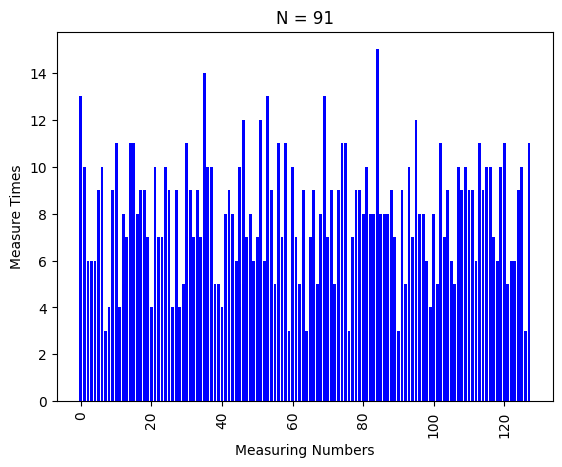

In [ ]:
# Example usage
N = 91  # Number to factorize

#start the timer
start_time = time.time()

factor, counts, steps = shors_algorithm(N, True, False)
counts = {int(k, 2): v for k, v in counts.items()}

print(f"A non-trivial factor of {N} is: {factor}")
print(f"--- {time.time() - start_time:.4f} seconds ---")

# Plot the results using matplotlib
if counts:  # Only plot if counts is not empty
    plt.bar(counts.keys(), counts.values(), color='blue')
    plt.xlabel('Measuring Numbers')
    plt.ylabel('Measure Times')
    plt.title(f'N = {N}')
    plt.xticks(rotation=90)
    plt.show()